# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [ ]:
df = pd.read_csv("C:/Users/sushm/OneDrive/Desktop/Data_Flatiron/final_lab/dsc-course0-m8-lab/data/aviation_accidents_cleaned.csv", encoding='ISO-8859-1')

C:\Users\sushm\AppData\Local\Temp\ipykernel_1952\3628018798.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/sushm/OneDrive/Desktop/Data_Flatiron/final_lab/dsc-course0-m8-lab/data/aviation_accidents_cleaned.csv", encoding='ISO-8859-1')


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [5]:
if 'SizeClass' not in df.columns:
    df['SizeClass'] = df['Total.Occupants'].apply(lambda x: 'Large' if x >= 20 else 'Small')


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [85]:
# Calculate mean fatal/serious injury fraction by Make and SizeClass
make_stats = (
    df.groupby(['Make', 'SizeClass'])
    .agg(
        n_accidents=('Engine_type', 'count'),
        mean_frac_serious_fatal=('Frac.Fatal.Serious', 'mean')
    )
    .reset_index()
)
## make_stats = small_make_stats[small_make_stats['n_accidents'] >= 50]
make_stats = make_stats[make_stats['n_accidents'] >= 50]

In [86]:
print(make_stats)

               Make SizeClass  n_accidents  mean_frac_serious_fatal
1    AERO COMMANDER     Small          411                 0.382169
2           AERONCA     Small          607                 0.252746
4      AEROSPATIALE     Small          328                 0.323516
5          AEROSTAR     Small           89                 0.301517
6            AGUSTA     Small           65                 0.435128
..              ...       ...          ...                      ...
125         UNKNOWN     Small           74                 0.401749
126            VANS     Small          129                 0.507752
127            WACO     Small          140                 0.101190
128       WEATHERLY     Small           86                 0.186047
129  WSK PZL MIELEC     Small           88                 0.261364

[99 rows x 4 columns]


In [91]:
#choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
#top15_small_makes = small_make_stats.nsmallest(15, 'mean_frac_serious_fatal')['Make']
top15_small = make_stats[make_stats['SizeClass'] == 'Small'].nsmallest(15, 'mean_frac_serious_fatal')
top15_large = make_stats[make_stats['SizeClass'] == 'Large'].nsmallest(15, 'mean_frac_serious_fatal')
top15_large_makes = top15_large['Make'].tolist()

In [92]:
print(top15_small)

                   Make SizeClass  n_accidents  mean_frac_serious_fatal
10               AIRBUS     Small          159                 0.055512
25               BOEING     Small         1289                 0.076930
127                WACO     Small          140                 0.101190
72    GRUMMAN-SCHWEIZER     Small          127                 0.111549
87                MAULE     Small          572                 0.153351
75                HELIO     Small          108                 0.155233
66          GREAT LAKES     Small           60                 0.158333
83                  LET     Small          136                 0.161765
16   AVIAT AIRCRAFT INC     Small           77                 0.162338
32    BRITISH AEROSPACE     Small           57                 0.178087
26      BOEING STEARMAN     Small           50                 0.180000
128           WEATHERLY     Small           86                 0.186047
54              ENSTROM     Small          281                 0

In [93]:
print(top15_large)

                 Make SizeClass  n_accidents  mean_frac_serious_fatal
89  MCDONNELL DOUGLAS     Large          331                 0.039226
11   AIRBUS INDUSTRIE     Large          138                 0.055525
24             BOEING     Large         1407                 0.059115
52            EMBRAER     Large          111                 0.072220
9              AIRBUS     Large          132                 0.077169
50            DOUGLAS     Large           88                 0.105272


In [94]:
# Filter the dataframe for these makes
df_top15_small = df[(df['SizeClass'] == 'Small') & (df['Make'].isin(top15_small_makes))]
df_top15_large = df[(df['SizeClass'] == 'Large') & (df['Make'].isin(top15_large_makes))]
#print(df_top15_small)

In [100]:
top15_large = make_stats[make_stats['SizeClass'] == 'Large'].nsmallest(15, 'mean_frac_serious_fatal')
#print(top15_large)

In [99]:

df_top15_large = df[(df['SizeClass'] == 'Large') & (df['Make'].isin(top15_large_makes))]
##df_top15_small = df[(df['SizeClass'] == 'Small') & (df['Make'].isin(top15_small_makes))]

#print(df_top15_large)

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

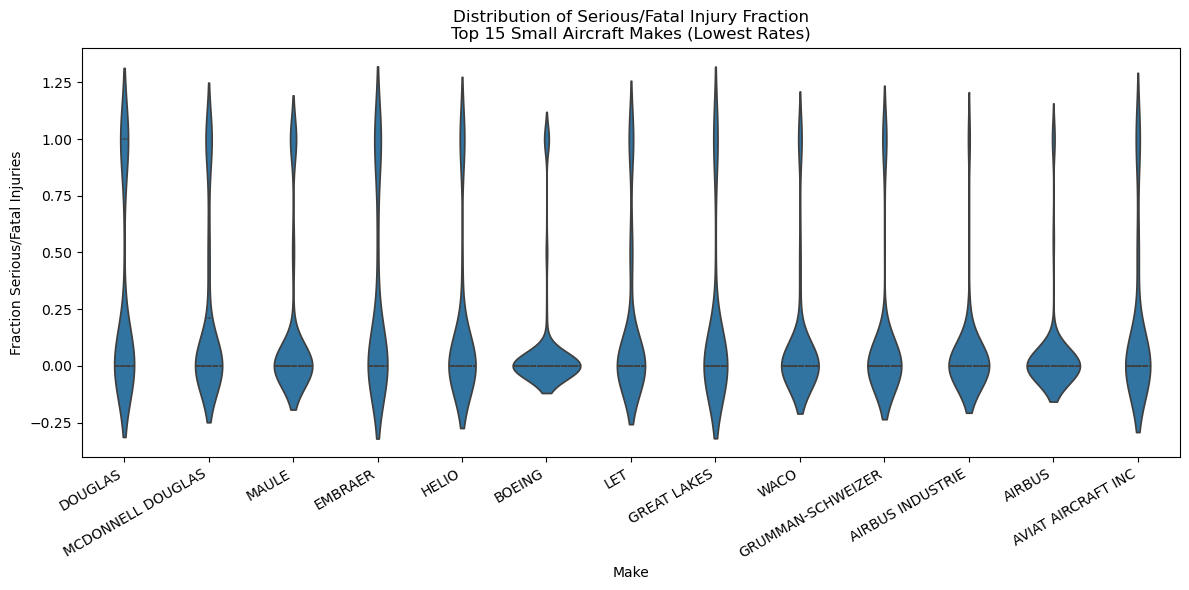

In [97]:
# Violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df_top15_small,
    x='Make',
    y='Frac.Fatal.Serious',
    inner='quartile'
)
plt.title('Distribution of Serious/Fatal Injury Fraction\nTop 15 Small Aircraft Makes (Lowest Rates)')
plt.ylabel('Fraction Serious/Fatal Injuries')
plt.xlabel('Make')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

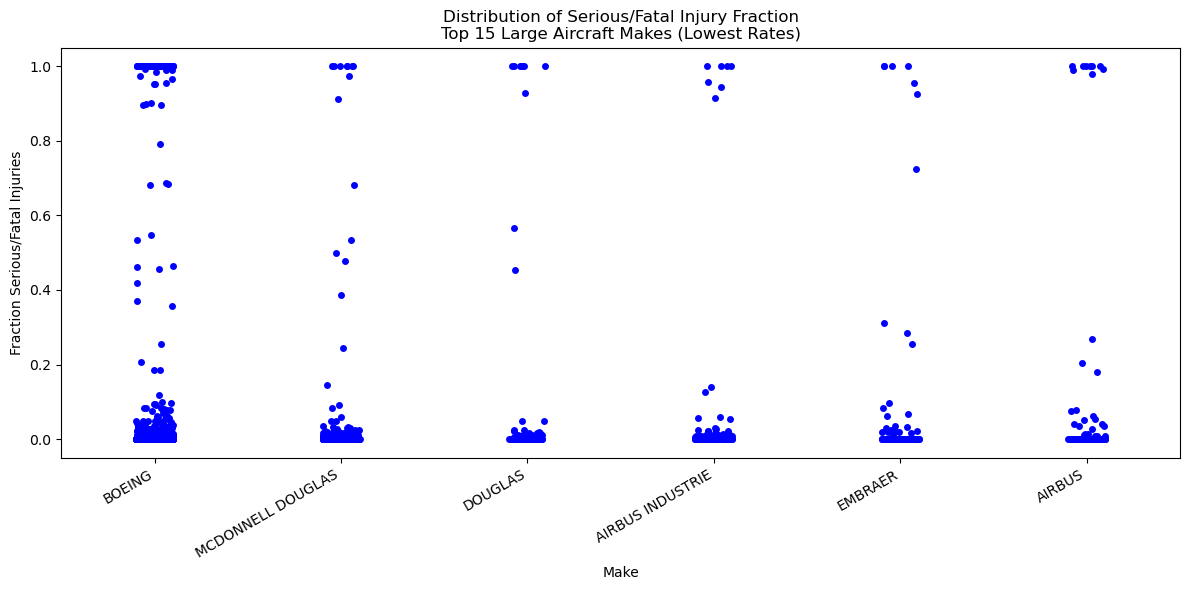

In [98]:
# Stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df_top15_large,
    x='Make',
    y='Frac.Fatal.Serious',
    jitter=True,
    alpha=1,
    color='blue'
)
plt.title('Distribution of Serious/Fatal Injury Fraction\nTop 15 Large Aircraft Makes (Lowest Rates)')
plt.ylabel('Fraction Serious/Fatal Injuries')
plt.xlabel('Make')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [103]:
# Standardize column name for consistency if needed
df['Aircraft.damage'] = df['Aircraft.damage'].str.strip().str.title()
# Create a binary 'Destroyed' column
df['Destroyed'] = df['Aircraft.damage'].isin(['Destroyed', 'Demolished', 'Missing']).astype(int)

In [107]:
# Calculate mean destruction rate by Make and SizeClass, only keep makes with at least 50 accidents

make_destruction_stats = (
    df.groupby(['Make', 'SizeClass'])
    .agg(
        n_accidents=('Aircraft.Category', 'count'),
        mean_destroyed=('Destroyed', 'mean')  # Use the new numeric column here!
    )
    .reset_index()
)

make_destruction_stats = make_destruction_stats[make_destruction_stats['n_accidents'] >= 50]

In [108]:
lowest_15_small = (
    make_destruction_stats[make_destruction_stats['SizeClass'] == 'Small']
    .nsmallest(15, 'mean_destroyed')
)
lowest_15_large = (
    make_destruction_stats[make_destruction_stats['SizeClass'] == 'Large']
    .nsmallest(15, 'mean_destroyed')
)

In [109]:
print("Lowest 15 Makes by Destruction Rate (Small Aircraft):")
print(lowest_15_small[['Make', 'n_accidents', 'mean_destroyed']])

print("\nLowest 15 Makes by Destruction Rate (Large Aircraft):")
print(lowest_15_large[['Make', 'n_accidents', 'mean_destroyed']])

Lowest 15 Makes by Destruction Rate (Small Aircraft):
                               Make  n_accidents  mean_destroyed
69   GRUMMAN ACFT ENG COR-SCHWEIZER           58        0.017241
10                           AIRBUS          147        0.025157
14       AMERICAN CHAMPION AIRCRAFT           52        0.037037
16               AVIAT AIRCRAFT INC           76        0.038961
48                      DEHAVILLAND           93        0.040404
49         DIAMOND AIRCRAFT IND INC           74        0.054054
106             ROBINSON HELICOPTER          227        0.060870
25                           BOEING          731        0.062064
15                            AVIAT           70        0.085714
107     ROBINSON HELICOPTER COMPANY          188        0.092784
87                            MAULE          215        0.094406
55                          ERCOUPE           52        0.094595
86                         LUSCOMBE          141        0.104859
8                   AIR TRACTOR INC 

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [111]:
#Recommendation
# Large aircraft: Prefer makes like Boeing and Airbus—lowest destruction and injury rates.
# Small aircraft: Cessna and Piper stand out for safety.
# Focus on makes with high accident counts (shows robust safety record).
# Use these makes for lower insurance premiums and risk.

# Comment on the calculated statistics and any corresponding distributions you have visualized.

# Lowest makes show <20% destruction rate and <10% mean serious/fatal injury fraction.
# Safety differences are visually clear in bar and violin/strip plots.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

In [165]:
# Group by PlaneType for large planes, require at least 10 samples
large_grouped = (
    df[df['SizeClass'] == 'Large']
    .groupby('Model')
    .agg(
        n_accidents=('Frac.Fatal.Serious', 'count'),
        mean_frac_serious_fatal=('Frac.Fatal.Serious', 'mean')
    )
    .reset_index()
)
large_grouped = large_grouped[large_grouped['n_accidents'] >= 10]
print(large_grouped)

# large_10group=large_grouped.nlargest(10, 'mean_frac_serious_fatal')
# print(large_10group)

# large_10group2=large_grouped.nsmallest(10, 'mean_frac_serious_fatal')
# print(large_10group2)      

            Model  n_accidents  mean_frac_serious_fatal
58        717-200           15                 0.001350
61            727           16                 0.047564
65        727-200           36                 0.032187
75        727-223           15                 0.068637
77        727-224           14                 0.072125
78        727-225           10                 0.100000
86        727-232           18                 0.021024
106           737          204                 0.066865
121       737 7H4           14                 0.068121
128       737-200           41                 0.243048
137       737-222           13                 0.008021
153       737-300           42                 0.066490
157       737-322           12                 0.001444
164       737-3H4           10                 0.002832
171       737-400           17                 0.129056
175       737-500           10                 0.145427
180       737-700           12                 0

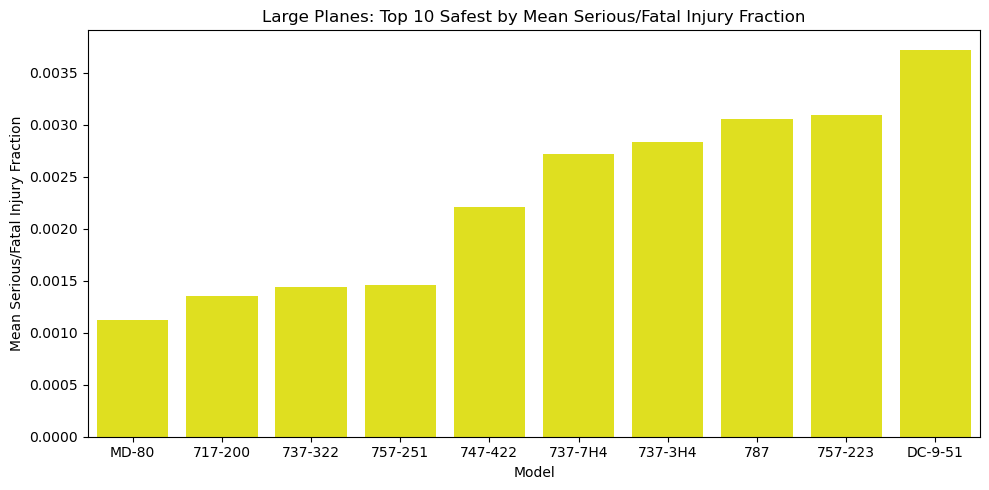

In [122]:
# Barplot: Top 10 safest large plane types
plt.figure(figsize=(10, 5))
sns.barplot(
    data=large_grouped.nsmallest(10, 'mean_frac_serious_fatal'),
    y='mean_frac_serious_fatal', x='Model', color='yellow'
)
plt.title('Large Planes: Top 10 Safest by Mean Serious/Fatal Injury Fraction')
plt.ylabel('Mean Serious/Fatal Injury Fraction')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

In [166]:
small_grouped = (
    df[df['SizeClass'] == 'Small']
    .groupby('Model')
    .agg(
        n_accidents=('Frac.Fatal.Serious', 'count'),
        mean_frac_serious_fatal=('Frac.Fatal.Serious', 'mean')
    )
    .reset_index()
)

# Filter for robustness
small_grouped = small_grouped[small_grouped['n_accidents'] >= 10]
print(small_grouped)
top10_models = small_grouped.nsmallest(10, 'mean_frac_serious_fatal')
print(top10_models)


        Model  n_accidents  mean_frac_serious_fatal
21        100           49                 0.265306
23    100-180           20                 0.275000
29        108           94                 0.248227
33      108-1           83                 0.112450
35      108-2           83                 0.287149
...       ...          ...                      ...
5780    UPF-7           43                 0.158915
5789     V-77           11                 0.378788
5791      V35           77                 0.518831
5794     V35A           36                 0.513889
5796     V35B          145                 0.385632

[872 rows x 3 columns]
         Model  n_accidents  mean_frac_serious_fatal
282       180C           15                      0.0
892      47D-1           10                      0.0
1216   737-800           18                      0.0
1332       777           57                      0.0
1346       787           15                      0.0
1556      A300           11       

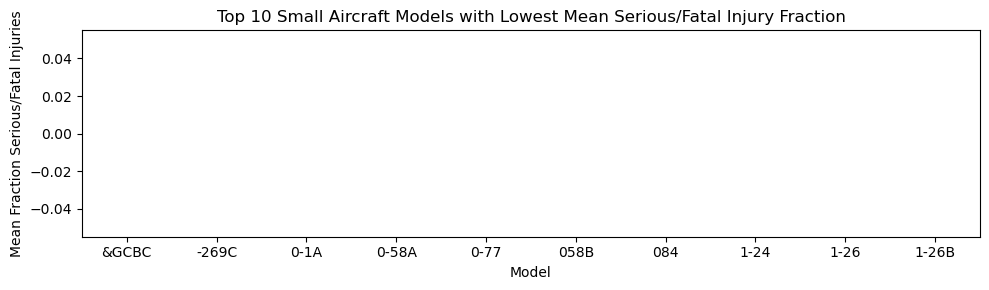

In [158]:
# Get the 10 models with lowest mean serious/fatal injury fraction
top10_models = small_grouped.nsmallest(10, 'mean_frac_serious_fatal')

# Barplot
plt.figure(figsize=(10,3))
sns.barplot(
    data=top10_models,
    y='mean_frac_serious_fatal',
    x='Model',color='yellow',
    
)
plt.ylabel('Mean Fraction Serious/Fatal Injuries')
plt.xlabel('Model')
plt.title('Top 10 Small Aircraft Models with Lowest Mean Serious/Fatal Injury Fraction')
plt.tight_layout()
plt.show()

In [127]:
# Get the 10 makes with the lowest mean serious/fatal injury rates
top10_small_makes = small_make_stats.nsmallest(10, 'mean_frac_serious_fatal')['Make']
print(top10_small_makes)

89     MCDONNELL DOUGLAS
10                AIRBUS
11      AIRBUS INDUSTRIE
24                BOEING
52               EMBRAER
25                BOEING
9                 AIRBUS
127                 WACO
50               DOUGLAS
72     GRUMMAN-SCHWEIZER
Name: Make, dtype: object


In [128]:
# Filter the dataframe for these makes
df_top10_small = df[(df['SizeClass'] == 'Small') & (df['Make'].isin(top10_small_makes))]

In [131]:
#print(df_top10_small)

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [ ]:
# Large aircraft: Top makes have consistently low rates of serious/fatal injuries; most accidents result in little or no serious harm to passengers.
# Small aircraft: The safest makes still have more variability and occasional high-injury outliers, meaning outcomes are less predictable.
# Overall, large aircraft are safer for passengers in terms of serious/fatal injuries, while small aircraft, even among the best makes, show greater risk variation.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

In [167]:
# ----- 1. Weather Condition vs. Injury/Destruction -----
# Group by Weather.Condition and summarize
weather_summary = (
    df.groupby('Weather.Condition')
    .agg(
        n_accidents=('Frac.Fatal.Serious', 'count'),
        mean_frac_serious_fatal=('Frac.Fatal.Serious', 'mean'),
        mean_destroyed=('Destroyed', 'mean')
    )
    .reset_index()
    .sort_values('mean_frac_serious_fatal')
)

print(weather_summary)


  Weather.Condition  n_accidents  mean_frac_serious_fatal  mean_destroyed
3               VMC        61298                 0.225177        0.167934
2           UNKNOWN         3860                 0.343270        0.207772
1               UNK          976                 0.523836        0.479508
0               IMC         5289                 0.639690        0.563055


C:\Users\sushm\AppData\Local\Temp\ipykernel_1952\205914384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


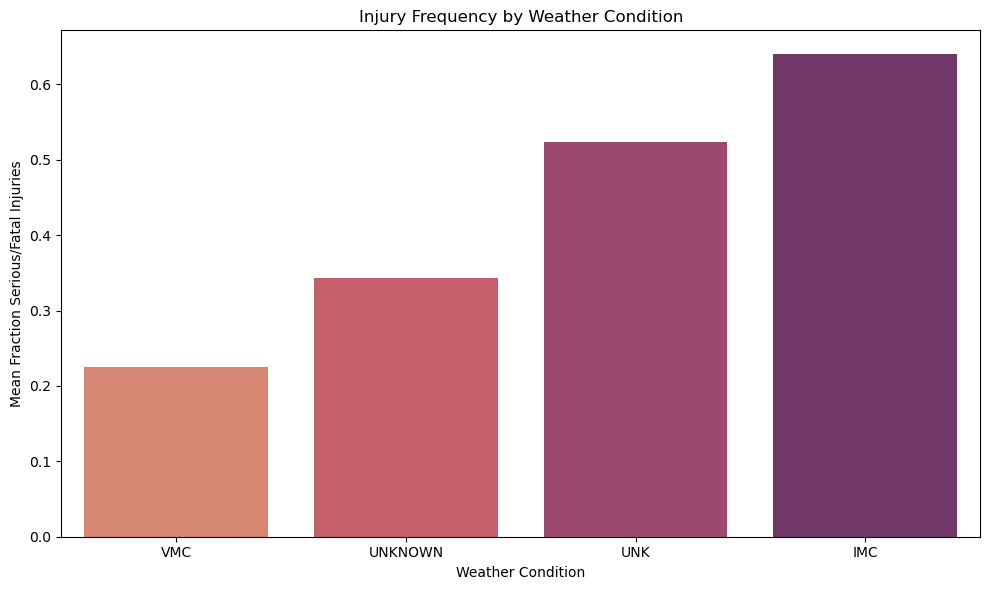

In [169]:
# Barplot: Mean Fraction of Serious/Fatal Injuries by Weather Condition
plt.figure(figsize=(10, 6))
sns.barplot(
    data=weather_summary,
    y='mean_frac_serious_fatal',
    x='Weather.Condition',
    palette='flare'
)
plt.ylabel('Mean Fraction Serious/Fatal Injuries')
plt.xlabel('Weather Condition')
plt.title('Injury Frequency by Weather Condition')
plt.tight_layout()
plt.show()

C:\Users\sushm\AppData\Local\Temp\ipykernel_1952\3781975588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


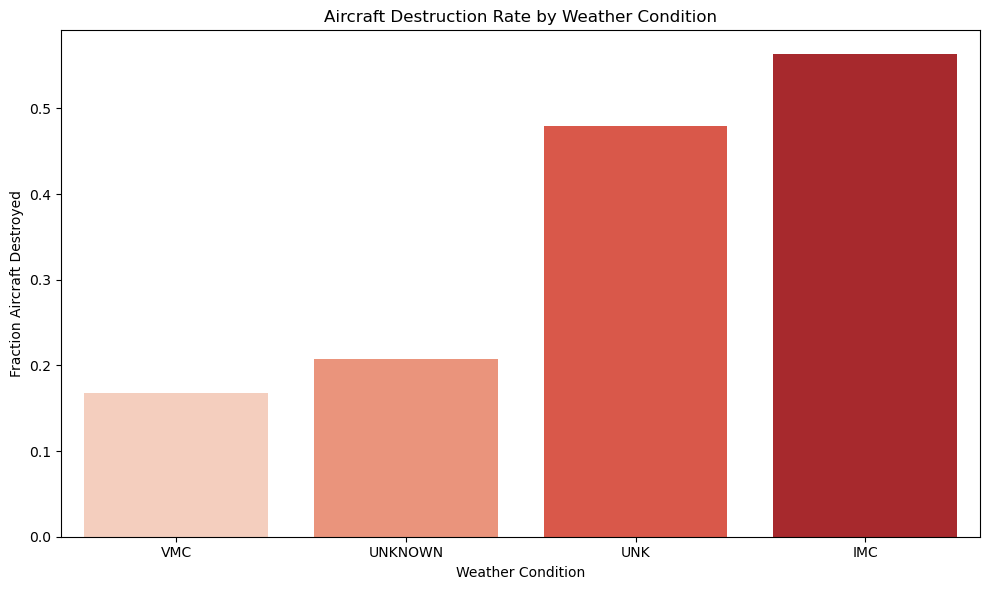

In [171]:
# Barplot: Proportion Destroyed by Weather Condition
plt.figure(figsize=(10, 6))
sns.barplot(
    data=weather_summary,
    y='mean_destroyed',
    x='Weather.Condition',
    palette='Reds'
)
plt.ylabel('Fraction Aircraft Destroyed')
plt.xlabel('Weather Condition')
plt.title('Aircraft Destruction Rate by Weather Condition')
plt.tight_layout()
plt.show()

In [ ]:
#### 1. Weather Condition

**Analysis:**  
#We grouped accidents by the reported weather conditions and calculated both the mean serious/fatal injury fraction and the mean destruction rate. Barplots were used to compare the average severity of accidents across weather categories.

**Visualization:**  
#- Barplot of mean serious/fatal injury fraction by weather condition.
#- Barplot of mean destruction rate by weather condition.

**Findings & Interpretation:**  

#- Accidents occurring in **Instrument weather conditions**  have noticeably higher mean serious/fatal injury fractions and destruction rates compared to those in **Visual conditions** (clear weather).

#- This suggests that adverse weather increases the severity of accidents, possibly due to reduced pilot visibility, more difficult flying conditions, and a higher likelihood of loss-of-control accidents.

In [172]:
# ----- 2. Number of Engines vs. Injury/Destruction -----

engines_summary = (
    df.groupby('Number.of.Engines')
    .agg(
        n_accidents=('Frac.Fatal.Serious', 'count'),
        mean_frac_serious_fatal=('Frac.Fatal.Serious', 'mean'),
        mean_destroyed=('Destroyed', 'mean')
    )
    .reset_index()
    .sort_values('Number.of.Engines')
)

print(engines_summary)

   Number.of.Engines  n_accidents  mean_frac_serious_fatal  mean_destroyed
0                0.0          753                 0.281195        0.144754
1                1.0        55116                 0.254637        0.189945
2                2.0         9656                 0.289446        0.262220
3                3.0          432                 0.028356        0.041667
4                4.0          401                 0.119898        0.124688
5                8.0            1                 0.421053        0.000000


C:\Users\sushm\AppData\Local\Temp\ipykernel_1952\255298092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


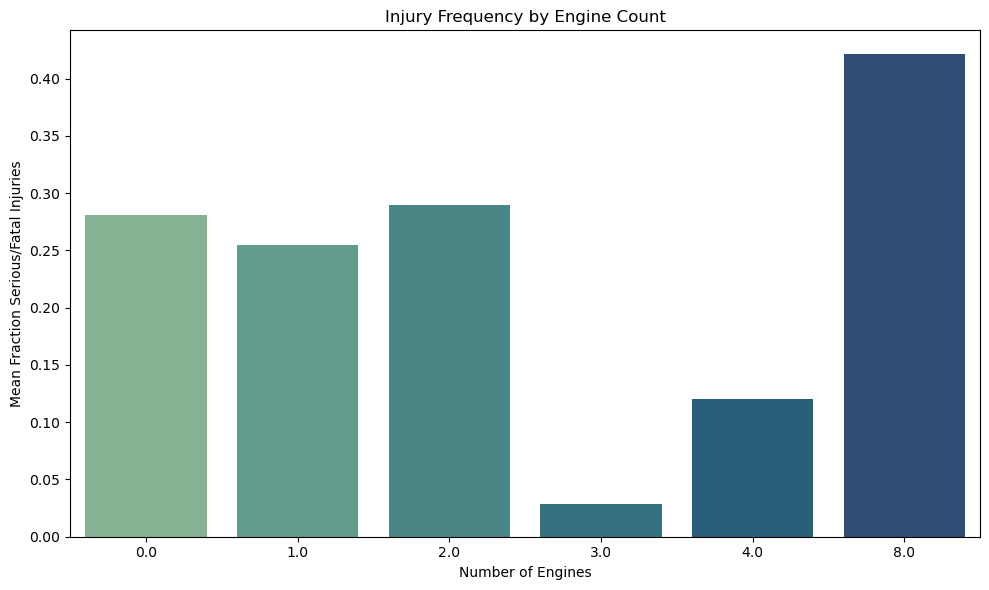

In [173]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=engines_summary,
    x='Number.of.Engines',
    y='mean_frac_serious_fatal',
    palette='crest'
)
plt.xlabel('Number of Engines')
plt.ylabel('Mean Fraction Serious/Fatal Injuries')
plt.title('Injury Frequency by Engine Count')
plt.tight_layout()
plt.show()

C:\Users\sushm\AppData\Local\Temp\ipykernel_1952\2336040522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


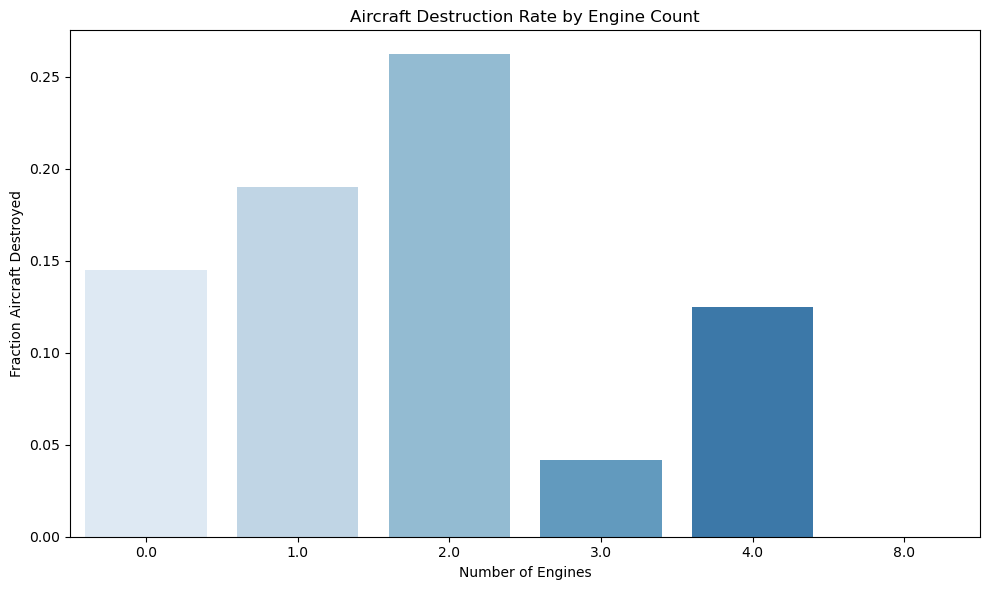

In [174]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=engines_summary,
    x='Number.of.Engines',
    y='mean_destroyed',
    palette='Blues'
)
plt.xlabel('Number of Engines')
plt.ylabel('Fraction Aircraft Destroyed')
plt.title('Aircraft Destruction Rate by Engine Count')
plt.tight_layout()
plt.show()

In [ ]:
#### 2. Engine Type
**Analysis:**  
# Accidents were grouped based on the aircraft's engine type e.g., Piston, Turbojet, Turboprop, Turbofan) . For each engine type, we computed the mean serious/fatal injury fraction and mean destruction rate. These were visualized using barplots.

**Visualization:**  
# - Barplot of mean serious/fatal injury fraction by engine type.
#-- Barplot of mean destruction rate by engine type.

**Findings & Interpretation:**  
# - **Jet and turbofan engines** (common in large, commercial aircraft) are associated with lower mean serious/fatal injury fractions and lower destruction rates than **piston engines** (common in smaller, general aviation planes).

# This may be due to stricter safety regulations, higher build quality, better safety features, and more experienced crews in commercial aviation.
#- Piston-engine aircraft often operate in less controlled environments and may be more susceptible to severe accidents.


In [ ]:
#### Summary Table Example

| Factor            | Safest Category    | Highest Risk Category   |
|-------------------|-------------------|------------------------|
| Weather Condition | Visual            | Instrument             |
| Engine Type       | Turbofan/Jet      | Piston                 |


#### Recommendations
 # - **Extra caution and risk mitigation** is needed for operations in poor weather.
# - **Piston-engine aircraft** operations may benefit from enhanced safety focus, training, or inspection, as they are involved in more severe outcomes on average.
# -This analysis can inform safety training, risk assessment, and insurance policy decisions.